In [12]:
#Ensemble des import utiles pour l'execution du notebook
import statsTuxML
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


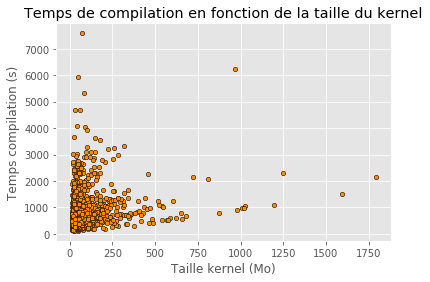

Coefficient de correlation : 0.19541423819128964


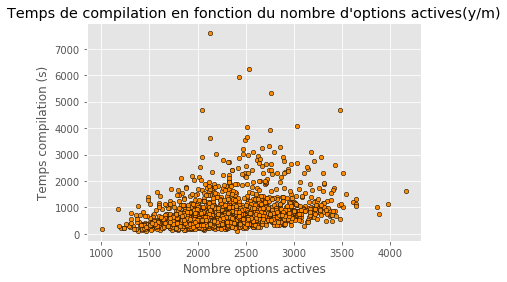

Coefficient de correlation : 0.3203368760008645


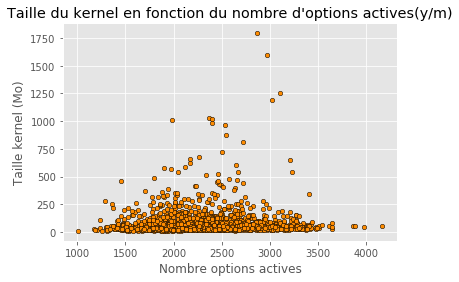

Coefficient de correlation : 0.058652947302275264


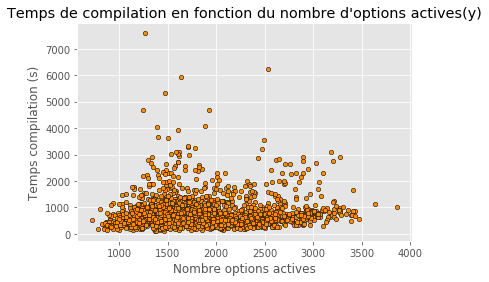

Coefficient de correlation : 0.054135786246071536


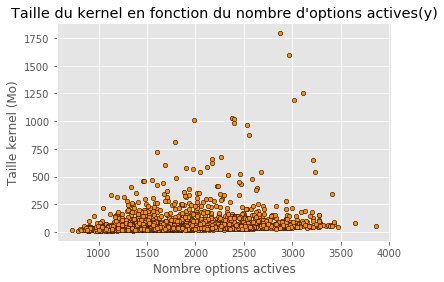

Coefficient de correlation : 0.19646782719525402


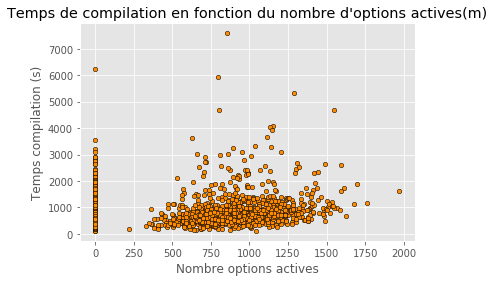

Coefficient de correlation : 0.22974758054806968


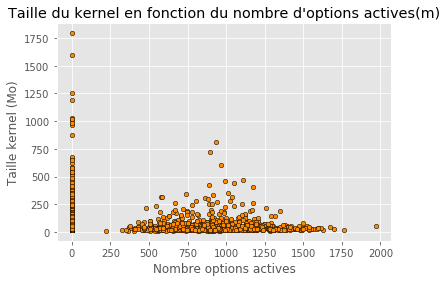

Coefficient de correlation : -0.1759356095987305

Nombre de compilation 2055
Informations sur les options activées en module {'Mean': 454.4705596107056, 'Min': 0, 'Total': 933937, 'Max': 1972}
Informations sur les options activées en dur {'Mean': 1853.9941605839415, 'Min': 724, 'Total': 3809958, 'Max': 3864}
Informations sur les options activées en tout {'Mean': 2308.4647201946473, 'Min': 1005, 'Total': 4743895, 'Max': 4167}
Informations sur la taille du kernel {'Mean': 73.57097192843175, 'Min': 10.527030944824219, 'Total': 151188.34731292725, 'Max': 1792.972885131836}
Informations sur le temps de compilation {'Mean': 766.6257785888091, 'Min': 108.521, 'Total': 1575415.9750000027, 'Max': 7588.32}


In [13]:
CSV = "set6.csv"

statistiques = statsTuxML.stats(CSV)
nbComp, stats_module, stats_yes, stats_combine, stats_size, stats_time  = statistiques

print("")
print("Nombre de compilation", nbComp)
print("Informations sur les options activées en module", stats_module)
print("Informations sur les options activées en dur", stats_yes)
print("Informations sur les options activées en tout", stats_combine)
print("Informations sur la taille du kernel", stats_size)
print("Informations sur le temps de compilation", stats_time)



In [14]:
listEncode = []

with open(CSV) as csvFile :
    reader = csv.DictReader(csvFile)
    for ligne in reader :
        for i in ligne :
            if i !="KERNEL_SIZE" and i !="COMPILE_TIME" and i != "":
                if not(ligne[i] in listEncode):
                    listEncode.append(ligne[i])


In [15]:
#Preprocessing des data
le = preprocessing.LabelEncoder()
le.fit(listEncode)
list(le.classes_)

['',
 '(none)',
 '-1',
 '/etc/keys/x509_evm.der',
 '/etc/keys/x509_ima.der',
 '/lib/modules/$UNAME_RELEASE/.config',
 '/sbin/init',
 '/sbin/tomoyo-init',
 '/sbin/usermode-helper',
 '0',
 '0x0',
 '0x1',
 '0x1000000',
 '0x200000',
 '0x378',
 '0x8000000',
 '0xa',
 '0xdead000000000000',
 '0xdffffc0000000000',
 '1',
 '10',
 '100',
 '1024',
 '1048576',
 '115200',
 '12',
 '120',
 '128',
 '13',
 '14',
 '16',
 '17',
 '2',
 '20',
 '2048',
 '20480',
 '21',
 '25',
 '250',
 '256',
 '28',
 '3',
 '30',
 '32',
 '4',
 '400',
 '4096',
 '437',
 '48000',
 '5',
 '5000',
 '512',
 '6',
 '64',
 '65536',
 '7',
 '768',
 '8',
 '80',
 '8192',
 'V1F100',
 'apparmor',
 'arch/x86/configs/x86_64_defconfig',
 'bic',
 'binder,hwbinder,vndbinder',
 'certs/signing_key.pem',
 'cfq',
 'cubic',
 'dctcp',
 'deadline',
 'elf64-x86-64',
 'htcp',
 'hybla',
 'ima-ng',
 'iso8859-1',
 'kernel.org',
 'm',
 'minstrel',
 'minstrel_ht',
 'n',
 'noop',
 'pfifo_fast',
 'reno',
 'rtc0',
 'selinux',
 'sha1',
 'smack',
 'tomoyo',
 'vegas',

In [16]:
#Extraction des données du CSV

data = [] #Toutes les infos sans temps de compilation et taille du kernel
info = [] #Temps de compilation et taille du kernel

infoTime = []
infoSize =[]

with open(CSV) as csvFile :
    reader = csv.DictReader(csvFile)
    for ligne in reader :
        size = int(ligne["KERNEL_SIZE"]) / (2**20)
        comp = float(ligne["COMPILE_TIME"])
        infoTime.append(comp)
        infoSize.append(size)
        info.append([size,comp])
        tmp = []
        for i in ligne :
            if i !="KERNEL_SIZE" and i !="COMPILE_TIME" and i != "":
                tmp.append(ligne[i])
        tmpProcess = le.transform(tmp)
        data.append(tmpProcess)


In [17]:
#Separation du training set et du testing set
#data_train, data_test, info_train, info_test = train_test_split(dataPreProcess, info, test_size=0.2, random_state=0)

data_train, data_test, infoSize_train, infoSize_test = train_test_split(data, infoSize, test_size=0.2, random_state=0)



In [18]:
# Decision Tree

# Apprentissage du model
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_2 = DecisionTreeRegressor() #Pas de profondeur max
regr_1.fit(data_train, infoSize_train)
regr_2.fit(data_train, infoSize_train)

# Prediction
info_predict_1 = regr_1.predict(data_test)
info_predict_2 = regr_2.predict(data_test)

# Calcul des erreurs
absErr_1 = mean_absolute_error(infoSize_test, info_predict_1)
absErr_2 = mean_absolute_error(infoSize_test, info_predict_2)

sqrtErr_1 = mean_squared_error(infoSize_test, info_predict_1)
sqrtErr_2 = mean_squared_error(infoSize_test, info_predict_2)

r2Score_1 = r2_score(infoSize_test, info_predict_1)
r2Score_2 = r2_score(infoSize_test, info_predict_2)

#Affichage des marges d'erreurs
print("Valeur faible = Meilleur prédiction")
print("Moyenne absolue des erreurs : arbre 1 :", absErr_1, "; arbre 2 :", absErr_2)
print("Moyenne au carré des erreurs : arbre 1 :", sqrtErr_1, "; arbre 2 :", sqrtErr_2)
print("")
print("Valeur proche de 1 = Meilleur prédiction")
print("Score r² : arbre 1 :", r2Score_1, "; arbre 2 :", r2Score_2)


Valeur faible = Meilleur prédiction
Moyenne absolue des erreurs : arbre 1 : 25.739845499767345 ; arbre 2 : 27.68502027971031
Moyenne au carré des erreurs : arbre 1 : 4622.700482728971 ; arbre 2 : 5302.610737935567

Valeur proche de 1 = Meilleur prédiction
Score r² : arbre 1 : 0.5505870762680072 ; arbre 2 : 0.48448708627095327


In [19]:
print(regr_1.get_params())
print(regr_2.get_params())

{'max_features': None, 'criterion': 'mse', 'min_impurity_split': None, 'min_samples_split': 2, 'min_impurity_decrease': 0.0, 'presort': False, 'splitter': 'best', 'min_weight_fraction_leaf': 0.0, 'max_depth': 10, 'random_state': None, 'min_samples_leaf': 1, 'max_leaf_nodes': None}
{'max_features': None, 'criterion': 'mse', 'min_impurity_split': None, 'min_samples_split': 2, 'min_impurity_decrease': 0.0, 'presort': False, 'splitter': 'best', 'min_weight_fraction_leaf': 0.0, 'max_depth': None, 'random_state': None, 'min_samples_leaf': 1, 'max_leaf_nodes': None}


In [20]:
#Random Forest Decision Tree

# Apprentissage du model (Profondeur limitée)
forest1 = RandomForestRegressor(max_depth=20, random_state=0)
forest1.fit(data_train, infoSize_train)

# Prediction
info_predict_3 = forest1.predict(data_test)

# Calcul des erreurs
absErr_3 = mean_absolute_error(infoSize_test, info_predict_3)

print(absErr_3)

26.092830628902945


In [21]:
#Random Forest Decision Tree

# Apprentissage du model (Pas de profondeur max)
forest2 = RandomForestRegressor(max_depth=None, random_state=0)
forest2.fit(data_train, infoSize_train)

# Prediction
info_predict_4 = forest2.predict(data_test)

# Calcul des erreurs
absErr_4 = mean_absolute_error(infoSize_test, info_predict_4)

print(absErr_4)

26.23184974651847
